<a href="https://colab.research.google.com/github/Shankar-Hadimani/1000_test/blob/master/notebooks/Unsupervised/Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
import pandas as pd
import io
import requests

Load the data file into a dataframe object

In [130]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/00488/Live_20210128.csv"
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')))
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


**Display the first 5 observation of the dataset**

In [131]:
df.head(5)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


**Display a concise summary**

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

**Exploitory Data Analysis**

In [133]:
df.describe()

,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,3525.500000,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,2035.304031,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,1763.250000,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,3525.500000,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,5287.750000,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,7050.000000,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN


In [134]:
print('{0} Total number of observation in dataframe.'.format( df.count()))
print('{0} #of nulls in column {1}.'.format( df['Column1'].isnull().sum(), 'column1'))
print('{0} #of nulls in column {1}.'.format( df['Column2'].isnull().sum(), 'column2'))
print('{0} #of nulls in column {1}.'.format( df['Column3'].isnull().sum(), 'column3'))

status_id           7050
status_type         7050
status_published    7050
num_reactions       7050
num_comments        7050
num_shares          7050
num_likes           7050
num_loves           7050
num_wows            7050
num_hahas           7050
num_sads            7050
num_angrys          7050
Column1                0
Column2                0
Column3                0
Column4                0
dtype: int64 Total number of observation in dataframe.
7050 #of nulls in column column1.
7050 #of nulls in column column2.
7050 #of nulls in column column3.


In [135]:
df.isnull().values.any()

True

In [136]:
df.isnull().any()

status_id           False
status_type         False
status_published    False
num_reactions       False
num_comments        False
num_shares          False
num_likes           False
num_loves           False
num_wows            False
num_hahas           False
num_sads            False
num_angrys          False
Column1              True
Column2              True
Column3              True
Column4              True
dtype: bool

In [137]:
# drop missing value columns
print('columns before: ', df.columns)
df.drop(['Column1', 'Column2', 'Column3','Column4','status_id'], axis=1, inplace=True)

print('number of columns, after: ', df.columns)

columns before:  Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3',
       'Column4'],
      dtype='object')
number of columns, after:  Index(['status_type', 'status_published', 'num_reactions', 'num_comments',
       'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas',
       'num_sads', 'num_angrys'],
      dtype='object')


Display all the unique status_type

In [138]:
df.nunique()

status_type            4
status_published    6913
num_reactions       1067
num_comments         993
num_shares           501
num_likes           1044
num_loves            229
num_wows              65
num_hahas             42
num_sads              24
num_angrys            14
dtype: int64

In [139]:
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

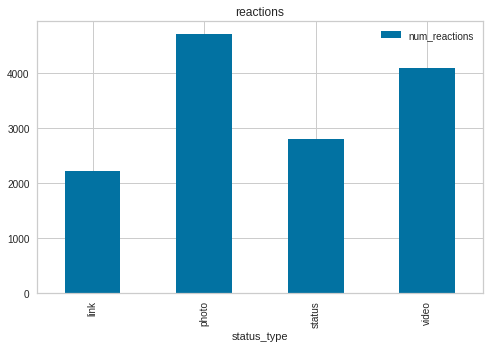

In [140]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
df.groupby('status_type')['num_reactions'].max().plot(kind='bar')
plt.legend()
plt.title('reactions')
plt.show()

In [141]:
# convert object types
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['status_type'] = le.fit_transform(df['status_type'].astype(str))
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_type       7050 non-null   int64 
 1   status_published  7050 non-null   object
 2   num_reactions     7050 non-null   int64 
 3   num_comments      7050 non-null   int64 
 4   num_shares        7050 non-null   int64 
 5   num_likes         7050 non-null   int64 
 6   num_loves         7050 non-null   int64 
 7   num_wows          7050 non-null   int64 
 8   num_hahas         7050 non-null   int64 
 9   num_sads          7050 non-null   int64 
 10  num_angrys        7050 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 606.0+ KB
None


In [142]:
df['status_type'].unique()

array([3, 1, 0, 2])

In [143]:
#  convert date feature onto integer
df['status_published'] = pd.to_datetime(df['status_published'], format="%m/%d/%Y %H:%M")
df['status_published'] = pd.to_datetime(df['status_published']).astype(int) / 10 ** 9

df.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,1.524377e+09,529,512,262,432,92,3,1,1,0
1,1,1.524351e+09,150,0,0,150,0,0,0,0,0
2,3,1.524291e+09,227,236,57,204,21,1,1,0,0
3,1,1.524278e+09,111,0,0,111,0,0,0,0,0
4,1,1.524022e+09,213,0,0,204,9,0,0,0,0


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_type       7050 non-null   int64  
 1   status_published  7050 non-null   float64
 2   num_reactions     7050 non-null   int64  
 3   num_comments      7050 non-null   int64  
 4   num_shares        7050 non-null   int64  
 5   num_likes         7050 non-null   int64  
 6   num_loves         7050 non-null   int64  
 7   num_wows          7050 non-null   int64  
 8   num_hahas         7050 non-null   int64  
 9   num_sads          7050 non-null   int64  
 10  num_angrys        7050 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 606.0 KB


In [145]:
# normalize and scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(df)

In [146]:
scaled_data[0:5]

array([[1.        , 0.97600665, 0.11231423, 0.02439257, 0.07651869,
        0.09171975, 0.14003044, 0.01079137, 0.00636943, 0.01960784,
        0.        ],
       [0.33333333, 0.97586672, 0.03184713, 0.        , 0.        ,
        0.03184713, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [1.        , 0.97554892, 0.04819533, 0.01124345, 0.0166472 ,
        0.0433121 , 0.03196347, 0.00359712, 0.00636943, 0.        ,
        0.        ],
       [0.33333333, 0.97547558, 0.02356688, 0.        , 0.        ,
        0.02356688, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.33333333, 0.97410306, 0.04522293, 0.        , 0.        ,
        0.0433121 , 0.01369863, 0.        , 0.        , 0.        ,
        0.        ]])

**Baseline Model**

**Elbow method to determine the number of cluster**

In [147]:
from sklearn.cluster import KMeans

sse = []
k_range = range(1,11)
for k in k_range:
  km = KMeans(n_clusters=k, n_init=10, init='k-means++', max_iter=100, random_state=42)
  km.fit(scaled_data)
  sse.append(km.inertia_)


Text(0, 0.5, 'num of clusters (K)')

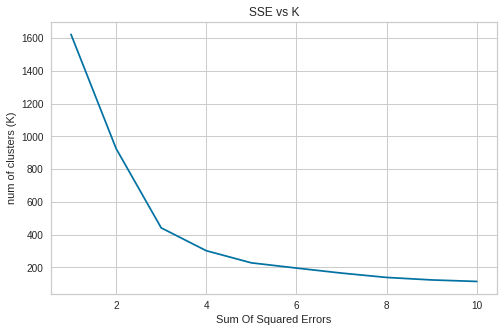

In [148]:
plt.figure(figsize=(8,5))
plt.title('SSE vs K')
plt.plot(k_range, sse, 'bx-')
plt.xlabel('Sum Of Squared Errors')
plt.ylabel('num of clusters (K)')


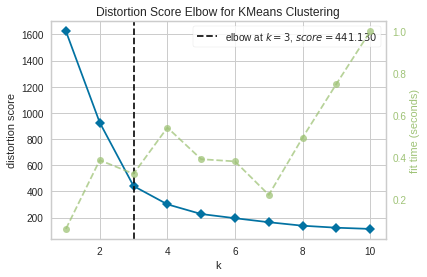

In [149]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(km, k=k_range)
 
visualizer.fit(scaled_data)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

**Verify using silhouette scores**

In [150]:
from sklearn.metrics import silhouette_score
sil = []
s_range = range(2,12)
for k in s_range:
  km = KMeans(n_clusters=k, n_init=10, init='k-means++', max_iter=100, random_state=42).fit(scaled_data)
  labels = km.labels_
  sil.append(silhouette_score(scaled_data, labels))

Text(0, 0.5, 'Silhouette scores')

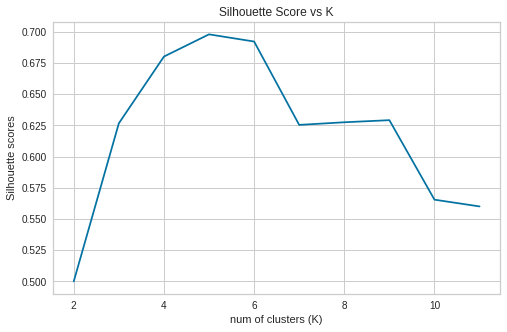

In [151]:
plt.figure(figsize=(8,5))
plt.title('Silhouette Score vs K')
plt.plot(s_range,sil)
plt.xlabel('num of clusters (K)')
plt.ylabel('Silhouette scores')


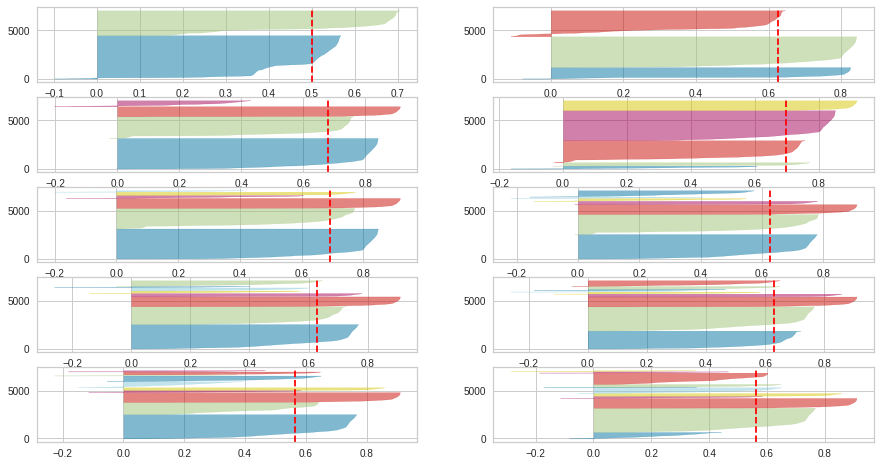

In [152]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(5, 2, figsize=(15,8))
for i in s_range:
    # Create KMeans instance for different number of clusters
    km = KMeans(n_clusters=i, n_init=10, init='k-means++', max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    # Create SilhouetteVisualizer instance with KMeans instance    Fit the visualizer
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(scaled_data)

In [153]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, n_init=10, init='k-means++', max_iter=100, random_state=42)
y_pred = km.fit_predict(scaled_data)
y_pred


array([2, 1, 2, ..., 1, 1, 1], dtype=int32)

**Assigning cluster label to each instance of the dataframe**

In [154]:
df['clusters_4'] = y_pred
df.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,clusters_4
0,3,1.524377e+09,529,512,262,432,92,3,1,1,0,2
1,1,1.524351e+09,150,0,0,150,0,0,0,0,0,1
2,3,1.524291e+09,227,236,57,204,21,1,1,0,0,2
3,1,1.524278e+09,111,0,0,111,0,0,0,0,0,1
4,1,1.524022e+09,213,0,0,204,9,0,0,0,0,1


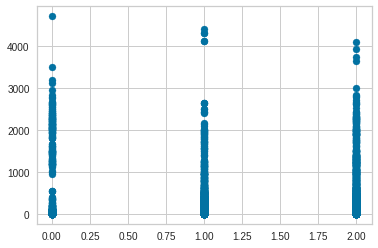

In [155]:
plt.scatter(df['clusters_4'], df['num_reactions'])
plt.show()

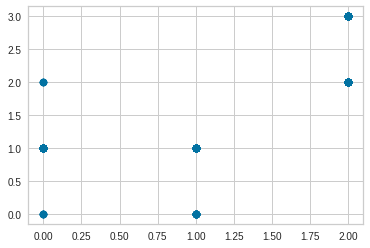

In [156]:

plt.scatter(df['clusters_4'], df['status_type'])
plt.show()

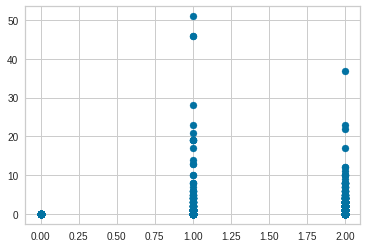

In [157]:
plt.scatter(df['clusters_4'], df['num_sads'])
plt.show()

In [158]:
print('lowest Sum of Squared Errors: ' + str(km.inertia_))

lowest Sum of Squared Errors: 441.1305600162456


**external cluster validation approaches**

In [159]:
from sklearn.metrics import adjusted_rand_score, rand_score

print("there's no actaul labels available. so adjusted rand score need actual labels")

there's no actaul labels available. so adjusted rand score need actual labels


### **Task 3: PCA on Fruit Data**

In [160]:
url="https://raw.githubusercontent.com/dphi-official/Datasets/master/fruit_data.csv"
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')))
df.head()

,fruit_label,mass,width,height,color_score
0,1,192,8.4,7.3,0.55
1,1,180,8.0,6.8,0.59
2,1,176,7.4,7.2,0.60
3,2,86,6.2,4.7,0.80
4,2,84,6.0,4.6,0.79


In [161]:
df.isnull().values.any()

False

In [162]:
df.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [163]:
from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA, TruncatedSVD
from sklearn.decomposition import FastICA, MiniBatchDictionaryLearning,SparsePCA
from sklearn.neighbors import (KNeighborsClassifier,NeighborhoodComponentsAnalysis)

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

**train test Split**

In [164]:
X = df.drop("fruit_label",1)   #Feature Matrix
y = df["fruit_label"]          #Target Variable

# Parameters
dim = len(X.iloc[0])
n_classes = len(np.unique(y))
n_neighbors = 3
random_state = 42

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y,random_state=random_state)

In [165]:
print(X_train.shape)
print(y_train.shape)

(29, 4)
(29,)


**Make Pipeline**

In [166]:
pca_2 = make_pipeline(StandardScaler(),
                    PCA(n_components=2,random_state=random_state)
                    )

###**PCA to find the first TWO principal components**

In [167]:
pca_2.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2, random_state=42))])

In [168]:
pca_2.transform(X_train)

array([[ 0.16920264,  0.70552323],
       [-0.30046055,  0.62626163],
       [-3.06471144,  0.35582788],
       [ 1.47236476,  2.2424987 ],
       [-0.19580687, -1.22137899],
       [ 0.79523052, -0.9693483 ],
       [-1.06464203,  0.57497377],
       [ 3.85561443, -0.86527488],
       [ 0.77687441,  0.40998821],
       [ 1.11753396,  0.36330523],
       [-1.07852215,  0.7828481 ],
       [ 1.04863477, -0.29679585],
       [-0.45813348, -0.55794978],
       [ 3.63803663, -0.78316527],
       [-3.30581915, -0.11021461],
       [ 1.02642111,  0.45145416],
       [-0.29114743, -0.95455017],
       [-0.79962954, -2.00391665],
       [ 1.27735331,  0.62931166],
       [-0.95463833,  0.89355072],
       [-0.10361288, -0.09450297],
       [ 0.79968687,  1.85823177],
       [-0.75136843,  0.63199257],
       [-0.29132906, -0.33655757],
       [ 0.30690097,  1.05320469],
       [-0.38508604, -0.48411304],
       [-0.23475392, -0.87412152],
       [-2.66124721, -0.07515831],
       [-0.34294586,

###**RESULTS**

In [169]:
pca_2.named_steps['pca'].explained_variance_ratio_

array([0.60306772, 0.23893983])

In [170]:
print(pca_2.named_steps['pca'].components_)

[[ 0.60853756  0.58186008  0.50057061 -0.20137021]
 [-0.22762217 -0.10931266  0.01458086 -0.96748452]]


In [171]:
print(pca_2.named_steps['pca'].explained_variance_)

[2.4984234  0.98989357]


In [172]:
print(np.cumsum(pca_2.named_steps['pca'].explained_variance_ratio_))

[0.60306772 0.84200754]


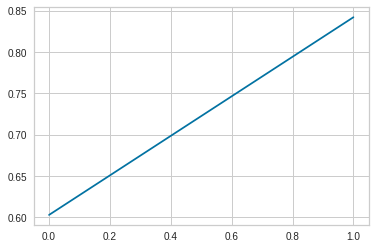

In [173]:
plt.plot(np.cumsum(pca_2.named_steps['pca'].explained_variance_ratio_))

###**PCA to find the first FOUR principal components**

In [174]:
pca_4 = make_pipeline(StandardScaler(),
                    PCA(n_components=4,random_state=random_state)
                    )

In [175]:
pca_4.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=4, random_state=42))])

In [176]:
pca_4.transform(X_train)

array([[ 1.69202643e-01,  7.05523233e-01,  1.49887039e-01,
        -7.87812177e-02],
       [-3.00460546e-01,  6.26261631e-01, -8.52120516e-01,
         2.40251162e-01],
       [-3.06471144e+00,  3.55827877e-01,  8.03419889e-01,
         4.12609169e-01],
       [ 1.47236476e+00,  2.24249870e+00,  1.33362908e+00,
        -3.13002645e-01],
       [-1.95806870e-01, -1.22137899e+00,  1.56396482e-01,
        -4.63291793e-01],
       [ 7.95230518e-01, -9.69348296e-01,  2.57111628e-01,
        -8.76887971e-02],
       [-1.06464203e+00,  5.74973773e-01, -1.22164448e+00,
         2.10425433e-01],
       [ 3.85561443e+00, -8.65274885e-01,  9.55421100e-01,
         5.85326136e-01],
       [ 7.76874414e-01,  4.09988210e-01, -7.18265942e-01,
         3.01940252e-02],
       [ 1.11753396e+00,  3.63305230e-01, -9.09112574e-01,
         6.93272027e-03],
       [-1.07852215e+00,  7.82848105e-01, -6.28564919e-01,
         5.86763321e-02],
       [ 1.04863477e+00, -2.96795848e-01, -5.50436688e-01,
      

####**RESULTS**

In [177]:
pca_4.named_steps['pca'].explained_variance_ratio_

array([0.60306772, 0.23893983, 0.13929919, 0.01869327])

In [178]:
print(np.cumsum(pca_4.named_steps['pca'].explained_variance_ratio_))

[0.60306772 0.84200754 0.98130673 1.        ]


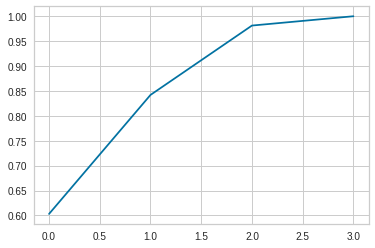

In [179]:
plt.plot(np.cumsum(pca_4.named_steps['pca'].explained_variance_ratio_))